<left><img width=25% src="img/helli.png"></left>


# Regression


by __Mahdi Niknejad__

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#1.-Intro">Intro</a></li>
        <li><a href="#2.-Simple-Linear-Regression">Simple Linear Regression</a></li>
        <li><a href="#3.-Multiple-Linear-Regression">Multiple Linear Regression</a></li>
        <li><a href="#4.-Non-Linear-Regression">Non Linear Regression</a></li>
    </ol>
</div>
<br>
<hr>

## 1. Intro

* Regression is the process of predicting a **continious** (y) value. like: Height, Price, CO2, ...
* **Independent** (X) vs **Dependent** (y) variables

In [68]:
import pandas as pd

df = pd.read_csv('./FuelConsumptionCo2.csv')

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

cdf.head(9)

# df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


## Regression Types

* Simple (only 1 independent)
    * **Linear**  **$\leftarrow$**
    * Non-Linear
* Multiple (multiple independent)
    * Linear
    * Non-Linear

## 2. Simple Linear Regression

Can we predict co2 emission from one of the independents? Lets try **`ENGINE_SIZE`**


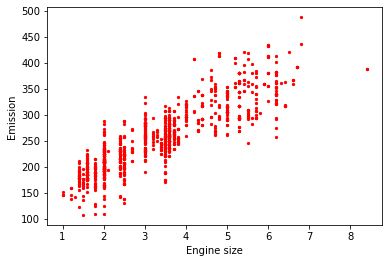

In [73]:
import matplotlib.pyplot as plt

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red', s=5)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Notes

* Relationship is obvious. (ENGIN_SIZE $\uparrow$  $\sim$  EMISSION $\uparrow$) 
* $\hat{y} = \theta_0 + \theta_1  \mathbf{x}_1$  
    * $\hat{y}$ is the dependent variable of predicted value.
    * $\mathbf{x}_1$ is the independent variable.
    * $\theta_0$ and $\theta_1$ are the parameters(coefficients) of the line. (intercept and slope)


## Creating train and test dataset

* Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.


In [75]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cdf, test_size=0.2, shuffle=True)

print(train.shape)
print(test.shape)

# train

(853, 4)
(214, 4)


## Plot trainset and testset

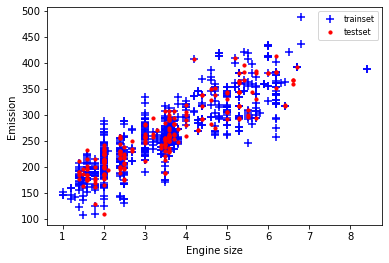

In [79]:
ltrain = plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, marker='+', color='blue', s=50)
ltest = plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, marker='o', color='red', s=10)

plt.legend((ltrain, ltest),
           ('trainset', 'testset'),
           loc='upper right',
           ncol=1,
           fontsize=8)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modeling

* Using **`sklearn`** package to model data
* As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.

In [86]:
from sklearn import linear_model
import numpy as np

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# print(train_x)
# train[['ENGINESIZE']]

Coefficients:  [[38.93149637]]
Intercept:  [125.76249133]


In [91]:
# train_x

In [26]:
# train.ENGINESIZE

## Plot the fit line over data

Text(0, 0.5, 'Emission')

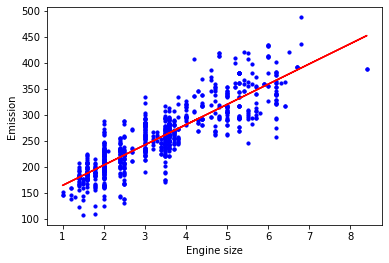

In [87]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', s=10)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation and Prediction

* We compare the actual values and predicted values to calculate the accuracy of a regression model.
* There are different model evaluation metrics, lets use **`MSE`** here to calculate the accuracy of our model based on the testset.

## MSE (Mean Square Error)

* MSE for each point is the quadratic distance of the prediction from the actual point and should be minimized.
* $MSE= \frac{1}{n} \sum_{i=1}^n(y_i - \hat{y}_i) ^ 2$

In [13]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("MSE: %.2f" % np.mean((test_y - test_y_hat) ** 2))

MSE: 828.64


In [93]:
test[['CO2EMISSIONS']].shape

(214, 1)

In [27]:
from sklearn.metrics import mean_squared_error

print("MSE: %.2f" % mean_squared_error(test_y, test_y_hat))

MSE: 828.64


## R2_score

* Popular metric for the accuracy of your model. represents how close the data values are to the fitted regression line. The higher the better.
* $RSE = \frac{\sum_{i=1}^n(y_i - \hat{y}_i) ^ 2}{\sum_{i=1}^n(y_i - \bar{y}) ^ 2}, R^2 = 1 - RSE$ 
* RSE means Relative squared error.
* R2 measures the proportion of changes in the dependent variable that can be attributed to the independent variable.

In [28]:
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(test_y , test_y_hat) )

R2-score: 0.81


## 3. Multiple Linear Regression

What about other independents? Lets see **`FUELCONSUMPTION_COMB`** and **`CYLINDERS`**


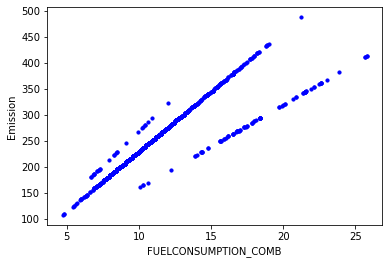

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue', s=10)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

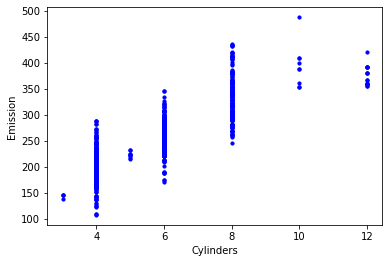

In [18]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue', s=10)
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

## Notes

* Try to have theoretical defence (Domain Expert) when choosing the independent variables. (میزان استفاده از کلمه عجیب در کنار میزان باران آمدن در شهر لرستان)
* In regression, `y` should be continious but `Xs` do not need to be continious. If they are not try to assign values (like 0,1,2,...) to categories. like: Sex (Male:0, Female: 1)
* There needs to be a linear relationship. Using plots cane be useful.

## Reading data, Splitting data

In [30]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cdf, test_size=0.2, shuffle=True)

print(train.shape)
print(test.shape)

(853, 6)
(214, 6)


## Modeling

$\hat{y} = \theta_0 + \theta_1  \mathbf{x}_1 + \theta_2  \mathbf{x}_2 + \theta_3  \mathbf{x}_3 $

In [35]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[10.11846789  8.01204076  9.58318064]]
Intercept:  [64.66798511]


## Notes

* Scikit-learn uses plain **`Ordinary Least Squares (OLS)`** method to solve this problem. It tries to minimizes the mean squared error (MSE) between the target variable (y) and our predicted output (𝑦̂ ) over all samples in the dataset. At last, OLS can find the best parameters.

## Prediction

In [49]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat= regr.predict(test_x)


print("MSE: %.2f" % np.mean((test_y - test_y_hat) ** 2))

# Explained variance score: 1 is perfect prediction
print('score: %.2f' % regr.score(test_x, test_y))

MSE: 632.06
score: 0.85


## Practice

Try to use a multiple linear regression with the same dataset, but this time use __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy? 

## 4. Non-Linear Regression

Lets see a non-linear plot. This is China GDP from 1960 to 2014

<img src="./china-gdp.png">

In [57]:
import pandas as pd

china_gdp_df = pd.read_csv('./china_gdp.csv')

china_gdp_df.head()
# china_gdp_df.tail()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


## Polynomial

* **(TRICK)** If you have X^2, it is possible to define a new X as X^2. So it can be represented as a special case of multiple linear regression. This is called polynomial. 


In [59]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [60]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cdf, test_size=0.2, shuffle=True)

print(train.shape)
print(test.shape)

(853, 4)
(214, 4)


In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.4 ,  5.76]])

## Notes

* Sometimes, the trend of data is not really linear, and looks **curvy**. In this case we can use Polynomial regression methods.
* $y = \theta_0 + \theta_1  x + \theta_2 x^2    \rightarrow   y = \theta_0 + \theta_1  x_1 + \theta_2  x_2$,   Here: x = `ENGIN_SIZE`
* $
\begin{bmatrix}
v_1\\\\
v_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
1 & v_1 & v_1^2\\\\
1 & v_2 & v_2^2\\\\
\vdots & \vdots & \vdots\\\\
1 & v_n & v_n^2
\end{bmatrix}
$

In [62]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)


# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.59239788 -1.42461409]]
Intercept:  [108.79738338]


Text(0, 0.5, 'Emission')

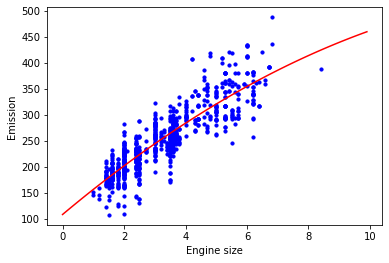

In [64]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', s=10)
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [66]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )  # Better?

MSE: 963.49
R2-score: 0.76


## Practice

Try to use a polynomial regression with the dataset but this time with degree three **(cubic)**. Does it result in better accuracy?